# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - all celltypes - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240227

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [36]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import numpy as np
            #import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt

import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats


In [37]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [38]:
adata = sc.read_h5ad("/home/acirnu/data/ACM_cardiac_leuco/processed_merged/ACM_6mpi_scANVI_cellstates_all_celltypes_more_HVGs_ac240227.raw.h5ad")
print(adata)
#adata object created from the annotated h5ad file.

AnnData object with n_obs × n_vars = 43227 × 29378
    obs: 'n_counts', 'n_genes', 'donor', 'sample', 'cell_source', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_counts-B2', 'pct_dropout_by_coun

In [39]:
adata.obs

,n_counts,n_genes,donor,sample,cell_source,seed_labels,condition,genotype,infection,library,...,pct_counts_ribo,percent_mt,percent_chrY,XIST-counts,S_score,G2M_score,batch,_scvi_batch,_scvi_labels,C_scANVI
AAACCCAAGATACAGT-1-A1,8562.0,2769,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf_2,AG_Gerull,CD4+T,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,23.662696,0.019038,0.000000,0.0,-0.339369,-0.496060,reference,7,1,CD4+T
AAACGCTTCTCGCTCA-1-A1,3855.0,1599,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf_1,AG_Gerull,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,1.815824,0.043320,0.025940,0.0,-0.169221,-0.390143,reference,6,7,Monocytes
AAAGGTACAGAACATA-1-A1,17536.0,3854,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf_2,AG_Gerull,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,10.213276,0.027315,0.051323,0.0,-0.317632,-0.578954,reference,7,7,Monocytes
AAAGTCCAGGGACACT-1-A1,14174.0,3788,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf_2,AG_Gerull,Macrophages,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,14.456046,0.023282,0.014110,0.0,-0.370103,-0.370084,reference,7,5,Macrophages
AAAGTCCCAGTAGGAC-1-A1,12498.0,3493,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf_2,AG_Gerull,Macrophages,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,9.809570,0.016323,0.040006,0.0,-0.142503,-0.357287,reference,7,5,Macrophages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGCTCTA-1-B2,3733.0,1849,Ttn_Ctr_noninf_1,Ttn_Ctr_noninf_1,AG_Gerull,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,...,5.062952,0.017412,0.000000,0.0,-0.179842,-0.495021,query,23,15,Macrophages
TTTGTTGGTACAGGTG-1-B2,24293.0,4744,Ttn_Ctr_MCMV_2,Ttn_Ctr_MCMV_2,AG_Gerull,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,...,13.086074,0.037254,0.000000,13.0,-0.435458,-0.744327,query,21,15,Macrophages
TTTGTTGGTAGTAAGT-1-B2,6564.0,2416,Ttn_HetKO_MCMV_2,Ttn_HetKO_MCMV_2,AG_Gerull,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,...,14.975625,0.010512,0.030469,0.0,0.363058,-0.589437,query,26,15,CD8+T
TTTGTTGTCCCAGGAC-1-B2,6388.0,2559,Ttn_Ctr_noninf_2,Ttn_Ctr_noninf_2,AG_Gerull,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,...,7.247965,0.023168,0.140889,0.0,0.080642,-0.877899,query,24,15,Macrophages


In [40]:
#adata.obs["infectionANDdisease"] = adata.obs["infection"].str.cat(adata.obs["disease"], sep = "&")
adata.obs
adata.obs["genotype"].cat.categories
#creating a new obs based on adding obs infection and obs disease --> CTRL&COPD, IAV&COPD, CTRL&healthy, IAV&healthy

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [41]:
adata.obs["infection"]
#adata.obs["cell_compartment"].cat.categories


AAACCCAAGATACAGT-1-A1    noninf
AAACGCTTCTCGCTCA-1-A1    noninf
AAAGGTACAGAACATA-1-A1    noninf
AAAGTCCAGGGACACT-1-A1    noninf
AAAGTCCCAGTAGGAC-1-A1    noninf
                          ...  
TTTGTTGCAAGCTCTA-1-B2    noninf
TTTGTTGGTACAGGTG-1-B2      MCMV
TTTGTTGGTAGTAAGT-1-B2      MCMV
TTTGTTGTCCCAGGAC-1-B2    noninf
TTTGTTGTCCGGGACT-1-B2    noninf
Name: infection, Length: 43227, dtype: category
Categories (2, object): ['MCMV', 'noninf']

In [42]:
adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_MCMV', 'Pkp2_Ctr_noninf', 'Pkp2_HetKO_MCMV',
       'Pkp2_HetKO_noninf', 'Ttn_Ctr_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_MCMV',
       'Ttn_HetKO_noninf'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [43]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="C_scANVI",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 43257 × 29393
  2 modalities
    rna:	43227 x 29378
      obs:	'n_counts', 'n_genes', 'donor', 'sample', 'cell_source', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_counts-B2', 'pct_dropout_by_counts-B2', 'total_counts-B2'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	30 x 15
      obs:	'donor', 'cell_source', 'condition', 'genotype', 'infection', 'model', 'batch', '_scvi_batch'
      var:	'n_cells'

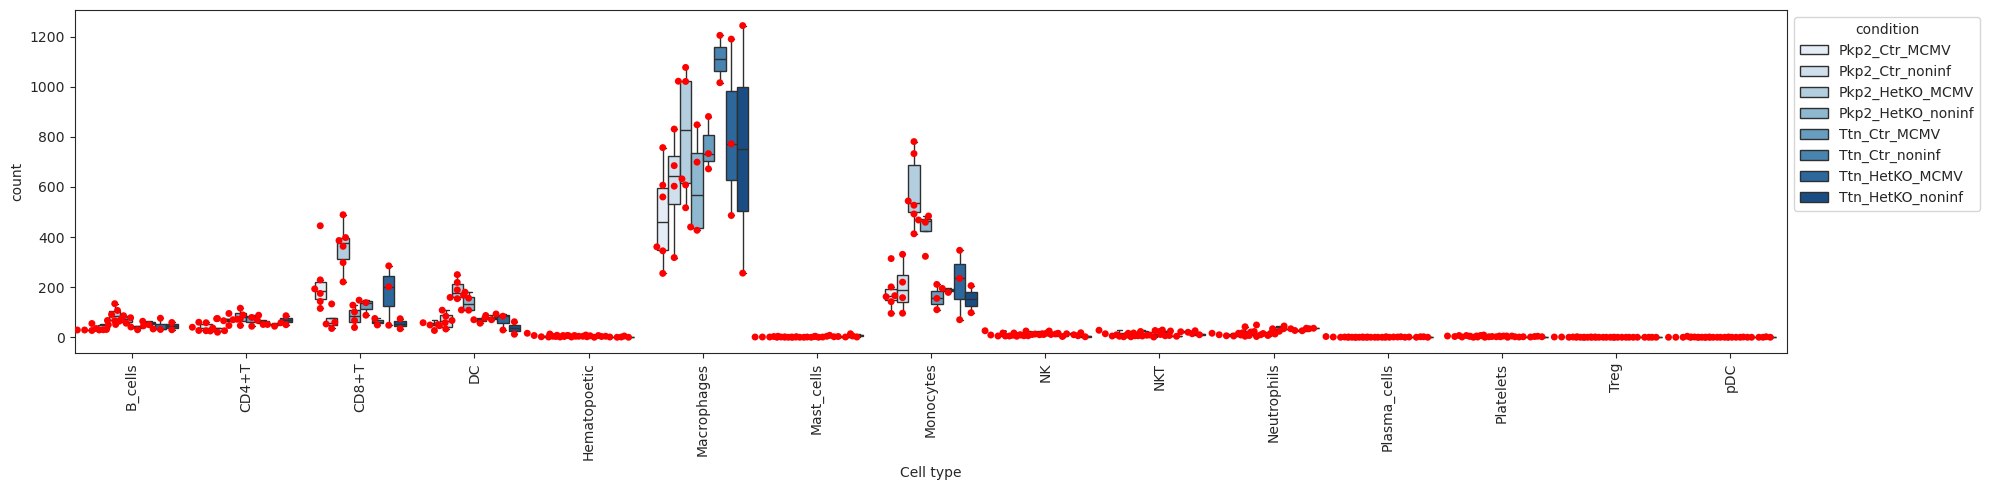

In [44]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    y_scale="count",
    figsize=(20, 5),
    add_dots=True,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

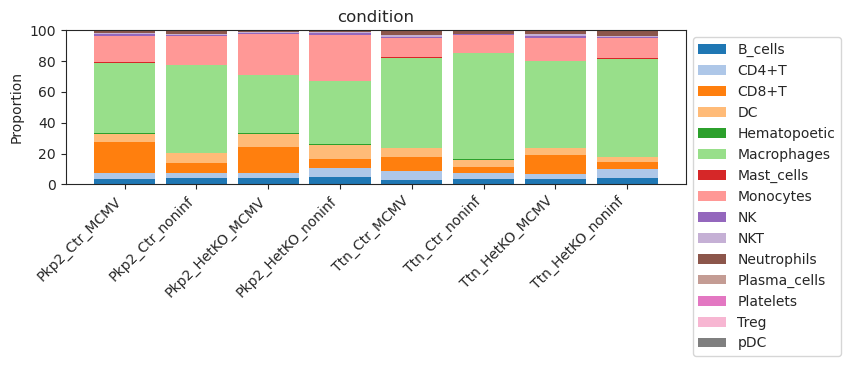

In [45]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="condition", figsize=(8, 2)
)
plt.show()

Function sccoda.run_nuts() broken at the moment
https://github.com/theislab/pertpy/issues/454
Downgrading Jax didn't solve the issue for me.

--> solution: completely new environment, install jax=0.4.20 prior to installing pertpy

In [46]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="genotype",
    reference_cell_type="automatic",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Automatic reference selection! Reference cell type set to NK

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [02:18<00:00, 79.29it/s, 255 steps of size 1.53e-02. acc. prob=0.87]


In [47]:
sccoda_data

MuData object with n_obs × n_vars = 43257 × 29393
  2 modalities
    rna:	43227 x 29378
      obs:	'n_counts', 'n_genes', 'donor', 'sample', 'cell_source', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_counts-B2', 'pct_dropout_by_counts-B2', 'total_counts-B2'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	30 x 15
      obs:	'donor', 'cell_source', 'condition', 'genotype', 'infection', 'model', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.Pkp2_HetKO]', 'effect_df_genotype[T.Ttn_Ctr]', 'effect_df_genotype[T.Ttn_HetKO]'

In [48]:
sccoda_model.set_fdr(sccoda_data, 0.2)

In [49]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate               Cell Type   
genotype[T.Pkp2_HetKO]  B_cells         False
                        CD4+T           False
                        CD8+T           False
                        DC               True
                        Hematopoetic    False
                        Macrophages      True
                        Mast_cells      False
                        Monocytes        True
                        NK              False
                        NKT             False
                        Neutrophils      True
                        Plasma_cells    False
                        Platelets       False
                        Treg            False
                        pDC             False
genotype[T.Ttn_Ctr]     B_cells         False
                        CD4+T            True
                        CD8+T            True
                        DC              False
                        Hematopoetic    False
                        Macrophages      Tr

In [50]:
sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_cells,0.000000,-0.052,0.571,0.181,0.5806,55.900469,-0.115712
CD4+T,0.000000,-0.234,0.393,0.106,0.3546,60.013694,-0.115712
CD8+T,0.000000,-0.269,0.325,0.095,0.3440,161.510921,-0.115712
DC,0.556518,0.222,0.860,0.180,0.9877,135.516127,0.687174
Hematopoetic,0.000000,-0.454,0.558,0.176,0.4346,7.512534,-0.115712
Macrophages,-0.207336,-0.398,0.003,0.134,0.6683,539.281097,-0.414834
Mast_cells,0.000000,-0.788,0.298,0.238,0.5127,4.911467,-0.115712
Monocytes,0.589596,0.324,0.842,0.139,0.9981,414.954331,0.734895
NK,0.000000,0.000,0.000,0.000,0.0000,15.037886,-0.115712


<Axes: xlabel='Cell Type', ylabel='log2-fold change'>

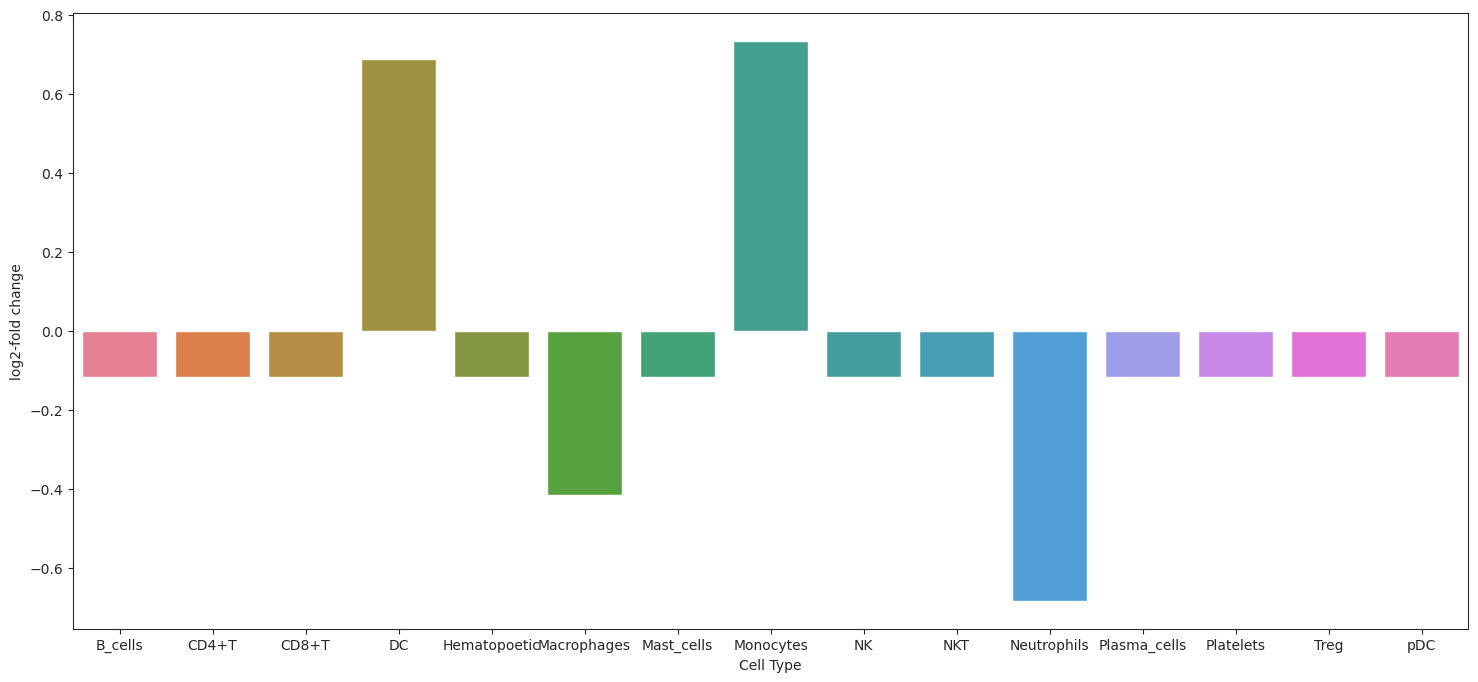

In [55]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"], x="Cell Type", y="log2-fold change", hue="Cell Type")

In [ ]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "genotype")
plt.show()